<font color='mediumblue'> **Projet : Consommation et production électrique en France** </font>

**Objectifs**

1. Manipulation de données avec pandas
    - Création des dataframes à partir des fichiers RTE
        - Dossier data_rte : données issues du site RTE (2012>2020) => données sur lesquelles ce notebook s'appuie
    - Exploration des données contenues dans ces dataframes   
    
2. Etude des relations entre variables



**Conseils généraux:**
- Afficher les premières lignes de la variable que vous êtes en train d'étudier peut vous aider à comprendre bien des problèmes (méthode **head** de pandas)
- De même la méthode **describe** de pandas est très précieuse pour repérer la présence de NaN, d'outliers, repérer les types de chaque variable etc. 
- Lorsque c'est nécessaire (selon ce que vous cherchez) penser à normaliser/standardiser les données
- C'est une analyse exploratoire : **tatonnez**, **faites des graphiques**, ... 
- N'hésitez pas à **consulter l'aide de Pandas** ou à chercher la réponse à vos questions sur internet (quasiment tous les bugs que vous observerez on déjà fait l'objet d'un post sur **stackoverflow**)

# Exploration des données

L'exploration des données présente différents intérêts :
- On comprend mieux nos données
- On voit déjà des premières tendances
- Elle nous donne des pistes à explorer pour la suite
- ...

Notre objectif : explorer au maximum les données pour en tirer de l'information

**L'importance de l'exploration des données**

La première étape de chargement, exploration et nettoyage de données peut être chronophage lorsqu'on traite des sets de données "réels"...  <br/> 
Cela fait partie du travail de data scientist, il faut s'y faire :-)

----------------------------------------
<font color=#66b3ff> 
    
<small> <i> 

It takes less than five lines of code to train a basic machine learning algorithm. Exploratory data analysis and data preparation in comparison take longer and comprise of 80% of the data scientist’s time.  <br/> 
https://towardsdatascience.com/build-the-story-around-data-using-exploratory-data-analysis-and-pandas-c85bf3beff87

----------------------------------------   
    
When I started learning machine learning and data science, much of it (all of it) was through online courses. I used them to create my own AI Masters Degree. All of them provided excellent curriculum along with excellent datasets. <br/> 
The datasets were excellent because they were ready to be used with machine learning algorithms right out of the box. <br/> 
You’d download the data, choose your algorithm, call the .fit() function, pass it the data and all of a sudden the loss value would start going down and you’d be left with an accuracy metric. Magic. <br/> 
This was how the majority of my learning went. Then I got a job as a machine learning engineer. I thought, finally, I can apply what I’ve been learning to real-world problems. <br/> 
Roadblock. <br/> 
The client sent us the data. I looked at it. WTF was this? <br/> 
Words, time stamps, more words, rows with missing data, columns, lots of columns. Where were the numbers? <br/> 
‘How do I deal with this data?’ I asked Athon. <br/> 
‘You’ll have to do some feature engineering and encode the categorical variables,’ he said, ‘I’ll Slack you a link.’ <br/> 
I went to my digital mentor. Google. ‘What is feature engineering?’ <br/> 
Google again. ‘What are categorical variables?’ <br/> 
Athon sent the link. I opened it. <br/> 
There it was. The next bridge I had to cross. Exploratory Data Analysis. <br/> 
You do exploratory data analysis to learn more about the data before you ever run a machine learning model. <br/> 
You create your own mental model of the data so when you run a machine learning model to make predictions, you’ll be able to recognise whether they’re BS or not.  <br/>
https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

</i> </small> </font> 

<font color='mediumblue'> **An EDA checklist**</font> 

1. Quelle(s) question(s) essayez-vous de résoudre/de prouver que vous avez tort ?
2. De quel type de données disposez-vous et comment traitez-vous les différents types ?
3. Qu'est-ce qui manque dans les données et comment y faire face ?
4. Où sont les valeurs aberrantes et pourquoi devriez-vous vous en soucier ?
5. Comment pouvez-vous ajouter, modifier ou supprimer des fonctionnalités pour tirer le meilleur parti de vos données ?
        
https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

**Objectifs**
    
1. Charger et nettoyer des données : read_csv, parse date, concat
2. Manipuler les données pour mieux les comprendre : groupby, pivot, stack/unstack

## Création des dataframes
**TODO**
        
1. Créer deux dataframes:
    - le 1er en concaténant les données nationales annuelles 
    - le 2nd en concaténant les données régionales annuelles
    - il faudra construire un index de datetime à partir des colonnes 'Date' et 'Heures'

**Aide**
- bien lire la note sur les données RTE afin de comprendre sur quelles données on travaille ...
- la méthode read_csv (pandas) peut lire les fichiers zip ;-) (encoding: latin-1, séparateur de colonnes: \t)
- un tips pour détecter l'encoding: https://superuser.com/questions/301552/how-to-auto-detect-text-file-encoding
- la méthode listdir (os) peut vous aider à lister tous les fichiers d'un dossier, startswith à sélectionner ceux qui vous intéressent
- pensez à "droper" les colonnes qui ne contiennent pas d'information
- pour le dataframe des données régionales, vous pouvez utiliser un multiindex
- certaines colonnes sont vides ? https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

**Notes sur les données RTE** 
- Elles proviennent du (génial) site éCO2mix et sont disponibles pour tout le monde (opendata)
- Leur format n'est pas optimal : un peu de manipulation est nécessaire afin de pouvoir les exploiter. Pas de panique, il faut juste procéder par étape !
    1. Chargez un des fichiers directement avec read_csv (n'importe lequel, ils sont tous construits de la même façon)
    2. Affichez le dataframe obtenu, et essayez de comprendre ce qui cloche ...
    3. Les quelques lignes de code suivante permettent d'afficher la 1ere et la 10ème ligne contenues dans un fichier. Est-ce que le problème apparait plus clairement ? (pensez à modifier le chemin d'accès...)
    4. Ecrivez une fonction qui permet de charger correctement un des fichiers
    5. Vous pouvez maintenant utiliser cette fonction pour créer votre dataframe en concaténant les fichiers

**Plus d'informations sur les données :** <br/> 
- https://www.rte-france.com/eco2mix <br/>
- https://www.rte-france.com/eco2mix/telecharger-les-indicateurs

Les données que nous allons traiter sont sous un format nouveau, il peut s'avérer difficile de les importer pour vous : fixez vous un objectif à ne pas passer plus de 2h à les importer. Si vous dépassez ce temps, je vous conseille de vous référer aux codes cachés que je vous transmets ci-dessous et de vous replonger dedans plus tard afin que vous ayez le temps d'explorer les données.

<details><summary>Code import données nationales</summary><br>
def create_datetime_index(df):<br/>
    df['DateTime'] = pd.to_datetime(df['Date'].map(str) + ' ' + df['Heures'].map(str))<br/>
    df.drop(['Date', 'Heures'], axis=1, inplace=True)<br/>
    df.set_index('DateTime', inplace=True)<br/>
    return <br/>

def read_rte_file(file_name):<br/>
    df = pd.read_csv(file_name, encoding='ISO-8859-1', sep='\t', index_col=None, header=None, skiprows=1, na_values='ND')<br/>
    df.drop(df.columns[-1], axis=1, inplace=True)<br/>
    df_titles = pd.read_csv(file_name, encoding='ISO-8859-1', sep='\t', index_col=None, nrows=0)<br/>
    df.columns = df_titles.columns<br/>
    return df<br/>

DATA_FILE = 'data/data_rte/'<br/>

files = [f for f in listdir(DATA_FILE) if f.startswith('eCO2mix_RTE_Annuel-Definitif')]<br/>

df_all = []<br/>

for f in files:<br/>
    df = read_rte_file(DATA_FILE+f)<br/>
    df_all.append(df)<br/>
df_all = pd.concat(df_all)<br/>
df_all = df_all[(\~df_all['Date'].isna())&(~df_all['Heures'].isna())]<br/>
create_datetime_index(df_all)<br/>
df_all.describe()<br/>
</details>

**Note : In a loop it is not a good idea to concat the dataframe at each step, because it will sort each dataframe and this will takes a lot of time. A better solution is to create a list of dataframes and concat at the end of the loop (as is done here).**

<details><summary>Code import données régionales</summary><br>
files = [f for f in listdir(DATA_FILE) if not f.startswith('eCO2mix_RTE_Annuel-Definitif')]<br/>

list_reg = set([f[len('eCO2mix_RTE_'):-len('_Annuel-Definitif_2013.zip')] for f in files])<br/>

df_all_reg = {}<br/>

for reg in list_reg:<br/>
    df_reg = []<br/>
    for f in files :<br/>
        if reg in f :<br/>
            df = read_rte_file(DATA_FILE+f)<br/>
            df.drop(len(df)-1, inplace=True)<br/>
            create_datetime_index(df)<br/>
            df_reg.append(df)<br/>
    df_reg = pd.concat(df_reg)<br/>
    df_reg.drop(['Périmètre', 'Nature'], axis=1, inplace=True)<br/>
    df_reg.dropna(how='all', inplace=True)<br/>
    df_all_reg[reg] =df_reg<br/>
df_all_reg = pd.concat(df_all_reg, axis=1)<br/>
</details>

### Start importation

In [110]:
import pandas as pd
import chardet
import xlrd
import os
import zipfile
from os import listdir
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
#rcParams['figure.figsize'] = 15, 3

 -----------------------------------------------------------------------------

In [111]:
run = 0
if run == 0:
    mainPath = os.getcwd()
    run += 1
mainPath

'/home/emmanuel.barriol@Digital-Grenoble.local/Documents/statistique/1 - Statistiques exploratoires/Notebooks'

In [112]:
def get_data_dir():
    os.chdir(mainPath)
    # Go one level Up
    tempPath = os.path.dirname(mainPath)
    tempPath = os.path.join(tempPath, 'data/')
    os.chdir(tempPath)
    return tempPath
dataPath = get_data_dir()

In [113]:
def extract_file(path, targetDir):
    os.chdir(path)
    with zipfile.ZipFile('data_rte.zip', 'r') as zip_ref:
        print(f"Main Zip contain {len(zip_ref.namelist())} .zip files to open")
        
        zip_ref.extractall(targetDir)
        newPath = os.path.join(path, targetDir + '/data_rte')
        os.chdir(newPath)
        return newPath

In [114]:
def get_list_of_df_from_zip(path):
    os.chdir(path)
    newPath = extract_file(path, "rawData")
    files = os.listdir(newPath)
    
    dfListNational = []
    dfListRegional = []
    i = 0
    
    print("oui")
    for file in files:
        print("----------------------------------------------------------------------")
        extensionTemp = os.path.splitext(file)[1]
        with zipfile.ZipFile(file, 'r') as tempZipFile:
            fileName = tempZipFile.namelist()
            print(fileName[0])
            with zipfile.ZipFile(file, 'r').open(fileName[0], 'r') as f:
                i+=1
                
                if "2019" in fileName[0] or "2020" in fileName[0]:
                    pass
                    print("DATAFRAME IGNORED --> 2029 ou 2020 wrong columns")
                    
                else:
                    pass
                    dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
                    #
                    if "RTE_Annuel" in fileName[0]:
                        dfListNational.append(dfTemp)
                        print("--> ANNUAL")
                    else:
                        print("--> REGIONAL")
                        dfListRegional.append(dfTemp)
                
                print(f"{i} / {len(files)} treated")
                    
    os.chdir(mainPath)
    return dfListNational, dfListRegional

In [115]:
nationalList, regionalList = get_list_of_df_from_zip(dataPath)

Main Zip contain 105 .zip files to open
oui
----------------------------------------------------------------------
eCO2mix_RTE_Occitanie_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
1 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Occitanie_Annuel-Definitif_2015.xls
--> REGIONAL
2 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2013.xls
--> REGIONAL
3 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Normandie_Annuel-Definitif_2018.xls


/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the futu

--> REGIONAL
4 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Auvergne-Rhône-Alpes_Annuel-Definitif_2014.xls
--> REGIONAL
5 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Annuel-Definitif_2013.xls
--> ANNUAL
6 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bretagne_Annuel-Definitif_2017.xls


/tmp/ipykernel_17423/2370632081.py:26: DtypeWarning: Columns (18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_line

--> REGIONAL
7 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2017.xls
--> REGIONAL
8 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bretagne_Annuel-Definitif_2018.xls
--> REGIONAL
9 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Annuel-Definitif_2020.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
10 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
11 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bretagne_Annuel-Definitif_2015.xls
--> REGIONAL
12 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2016.xls
--> REGIONAL
13 / 105 treated
-----------

/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: DtypeWarning: Columns (18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_c

--> ANNUAL
15 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2018.xls
--> REGIONAL
16 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Auvergne-Rhône-Alpes_Annuel-Definitif_2013.xls
--> REGIONAL
17 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_PACA_Annuel-Definitif_2017.xls
--> REGIONAL
18 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bretagne_Annuel-Definitif_2014.xls
--> REGIONAL
19 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Normandie_Annuel-Definitif_2014.xls


/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the futu

--> REGIONAL
20 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bourgogne-Franche-Comté_Annuel-Definitif_2018.xls
--> REGIONAL
21 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
22 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bourgogne-Franche-Comté_Annuel-Definitif_2015.xls
--> REGIONAL
23 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2013.xls
--> REGIONAL
24 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2015.xls
--> REGIONAL
25 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2017.xls


/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the futu

--> REGIONAL
26 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2014.xls
--> REGIONAL
27 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Nouvelle-Aquitaine_Annuel-Definitif_2013.xls
--> REGIONAL
28 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Normandie_Annuel-Definitif_2017.xls
--> REGIONAL
29 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2013.xls
--> REGIONAL
30 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2018.xls
--> REGIONAL
31 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2016.xls


/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the futu

--> REGIONAL
32 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bretagne_Annuel-Definitif_2016.xls
--> REGIONAL
33 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2015.xls
--> REGIONAL
34 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
35 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bourgogne-Franche-Comté_Annuel-Definitif_2020.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
36 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Normandie_Annuel-Definitif_2015.xls
--> REGIONAL
37 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_PACA_Annuel-Definitif_2018.xls
--> RE

/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the futu

--> REGIONAL
39 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2020.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
40 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_PACA_Annuel-Definitif_2014.xls
--> REGIONAL
41 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Nouvelle-Aquitaine_Annuel-Definitif_2017.xls
--> REGIONAL
42 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Occitanie_Annuel-Definitif_2014.xls
--> REGIONAL
43 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Nouvelle-Aquitaine_Annuel-Definitif_2018.xls
--> REGIONAL
44 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bourgogne-Franche-Comté_Annuel-Definitif_2017.xls


/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the futu

--> REGIONAL
45 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2016.xls
--> REGIONAL
46 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_PACA_Annuel-Definitif_2013.xls
--> REGIONAL
47 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2015.xls
--> REGIONAL
48 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2018.xls
--> REGIONAL
49 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Nouvelle-Aquitaine_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
50 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Occitanie_Annuel-Definitif_2013.xls


/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the futu

--> REGIONAL
51 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Normandie_Annuel-Definitif_2013.xls
--> REGIONAL
52 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
53 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Annuel-Definitif_2017.xls
--> ANNUAL
54 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Normandie_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
55 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bretagne_Annuel-Definitif_2013.xls
--> REGIONAL
56 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Annuel-Definitif_2018.xls


/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the futu

--> ANNUAL
57 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Auvergne-Rhône-Alpes_Annuel-Definitif_2018.xls
--> REGIONAL
58 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2016.xls
--> REGIONAL
59 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2020.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
60 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bourgogne-Franche-Comté_Annuel-Definitif_2016.xls
--> REGIONAL
61 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Nouvelle-Aquitaine_Annuel-Definitif_2020.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
62 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Hauts-de-France_Annuel-Definiti

/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the futu

--> REGIONAL
68 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bourgogne-Franche-Comté_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
69 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2018.xls
--> REGIONAL
70 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Auvergne-Rhône-Alpes_Annuel-Definitif_2015.xls
--> REGIONAL
71 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Nouvelle-Aquitaine_Annuel-Definitif_2014.xls
--> REGIONAL
72 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Occitanie_Annuel-Definitif_2017.xls
--> REGIONAL
73 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2014.xls
--> REGIONAL
74 / 105 

/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the futu

--> REGIONAL
75 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2013.xls
--> REGIONAL
76 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2013.xls
--> REGIONAL
77 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2020.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
78 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
79 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bourgogne-Franche-Comté_Annuel-Definitif_2014.xls
--> REGIONAL
80 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Occitanie_Annuel-Definitif_2020.x

/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the futu

--> ANNUAL
84 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Auvergne-Rhône-Alpes_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
85 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2017.xls
--> REGIONAL
86 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2017.xls
--> REGIONAL
87 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2015.xls
--> REGIONAL
88 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_PACA_Annuel-Definitif_2015.xls
--> REGIONAL
89 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2016.xls
--> REGIONAL
90 / 105 treated
----------

/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: DtypeWarning: Columns (18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_c

--> REGIONAL
97 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2020.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
98 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Auvergne-Rhône-Alpes_Annuel-Definitif_2020.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
99 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Annuel-Definitif_2016.xls
--> ANNUAL
100 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Occitanie_Annuel-Definitif_2016.xls
--> REGIONAL
101 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bourgogne-Franche-Comté_Annuel-Definitif_2013.xls
--> REGIONAL
102 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Occitanie_Annuel-Definitif_2018.xls


/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the futu

--> REGIONAL
103 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2015.xls
--> REGIONAL
104 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Auvergne-Rhône-Alpes_Annuel-Definitif_2017.xls
--> REGIONAL
105 / 105 treated


/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
/tmp/ipykernel_17423/2370632081.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)


### Check shape of dataframe before concate

In [116]:
def check_shape(dfList):
    for file in dfList:
        if len(file.columns) != len(dfList[0].columns):
            print("Not same size")
            return False
        else:
            print(f"Homogene dataframe --> {len(file.columns)} columns")
            return True

In [117]:
nationalDfCheck = check_shape(nationalList)
regionalDfCheck = check_shape(regionalList)

Homogene dataframe --> 36 columns
Homogene dataframe --> 14 columns


In [118]:
if check_shape(nationalList):
    df_national = pd.concat(el for el in nationalList)
if check_shape(regionalList):
    df_regional = pd.concat(el for el in regionalList)
    if len(df_regional.columns) > 13:
        # Remove the col 14 that is wrong
        df_regional = df_regional.drop(df_regional.columns[-1], axis=1)

Homogene dataframe --> 36 columns
Homogene dataframe --> 14 columns


In [119]:
# df_regional.head(5)
# df_national.head(5)

In [120]:
# df_regional.tail(5)
# df_national.tail(5)

In [121]:
def filter_RTE_rows(df):
    valuePerimetreName = df["Périmètre"].value_counts().index.tolist()
    print(valuePerimetreName)
    mask = df["Périmètre"].str.contains("RTE")
    new_df = df[~mask]
    return new_df

In [122]:
df_national = filter_RTE_rows(df_national)
df_regional = filter_RTE_rows(df_regional)

['France', "RTE ne pourra être tenu responsable de l'usage qui pourrait être fait des données mises à disposition, ni en cas de prévisions qui se révèleraient imprécises."]
['Occitanie', 'Pays-de-la-Loire', 'Normandie', 'Auvergne-Rhône-Alpes', 'Bretagne', 'Ile-de-France', 'Nouvelle-Aquitaine', 'PACA', 'Bourgogne-Franche-Comté', 'Grand-Est', 'Hauts-de-France', 'Centre-Val de Loire', "RTE ne pourra être tenu responsable de l'usage qui pourrait être fait des données mises à disposition, ni en cas de prévisions qui se révèleraient imprécises."]


In [123]:
def add_datetime_index(df):
    try:
        df["datetime"] = pd.to_datetime(df['Date'] + ' ' + df['Heures'].astype(str))
        df.set_index('datetime', inplace=True)
        df.drop(["Date", "Heures"], axis=1, inplace=True)
    except:
        print("Already done")

In [124]:
add_datetime_index(df_national)
add_datetime_index(df_regional)

#### Convert column value to float

In [ ]:
for col in df_n.columns:
    df_n[col] = pd.to_numeric(df_n[col], errors="coerce")
df_n.dtypes

# Exploration du dataset

## Réflexion

A présent vous savez ce que vous avez dans vos données (cf. https://www.rte-france.com/eco2mix)<br/>

Avant de vous lancer dans la mise en pratique, prenez quelques minutes (max 30 minutes) pour observer les données et les premières statistiques descriptives que vous avez trouvées : quelles questions vous posez-vous sur les données ? Qu'avez-vous envie d'explorer ? (essayez de ne pas vous laisser biaiser par les titres du Notebook)

## Mise en application

**TODO**
    
L'objectif ici est de **comprendre les données** présentes dans les deux dataframes que vous avez créés. Réfléchissez aux descripteurs statistiques les plus appropiés pour chaque question.  
<br/>

1. Dataset national
    - Tracer la consommation nationale en fonction du temps
    - Tracer la production des différentes sources. Quelle est la source de production largement majoritaire ?
    - Afficher sur un même graphique : la production nucléaire, la consommation et la somme des échanges aux frontières. En déduire la signification du signe des échanges (positif ou négatif) ?
    - Quelles sources ont un fonctionnement
        - de "base" (production régulière) ?
        - de "pointe" (production ponctuelle, uniquement lorsque la base ne suffit plus) ?

 <br/>
2. Dataset régional
    - Tracer sur un même graphique la consommation des différentes régions en fonction du temps
    - Peut-on observer des différences comportementales significatives entre les régions ? (par ex entre une région du nord et une région du sud)
    - Quelles régions sont les plus consommatrices ? Y a-t-il un moment dans l'année où la région IdF n'est pas la plus consommatrice ?
    - Afficher la production nucléaire par région en ftc du temps. Dans quelles régions sont situées les centrales nucléaires ?
    - Quelles régions produisent le plus de solaire / éolien ?
    - Observer les informations concernant la région AuRA. Retrouver la signification du signe des échanges ? Pourquoi la région est-elle autant exportatrice ?

**Aide**
- la méthode **.plot()** fonctionne parfaitement avec un datetime en index
- si vous utilisez un multiindex, la méthode **swaplevel** peut vous aider
- attention aux **nan** pour les plots..

### Dataset national

#### consommation nationale en fonction du temps

##### Remove Nan

In [144]:
df_n = df_national.copy()
df_n = df_n.sort_index()
df_n.dropna(axis=0, inplace = True)
print(f"Removed rows --> {df_national.shape[0] - df_n.shape[0]}")

Removed rows --> 123082


##### Clean Useless columns

In [145]:
if "Périmètre" in df_n.columns.tolist() and "Nature" in df_n.columns.tolist():
    df_n.drop(["Périmètre", "Nature"], axis=1, inplace=True)

In [146]:
for el in df_n.columns:
    print(f"--> {el}")

--> Consommation
--> Prévision J-1
--> Prévision J
--> Fioul
--> Charbon
--> Gaz
--> Nucléaire
--> Eolien
--> Solaire
--> Hydraulique
--> Pompage
--> Bioénergies
--> Ech. physiques
--> Taux de Co2
--> Ech. comm. Angleterre
--> Ech. comm. Espagne
--> Ech. comm. Italie
--> Ech. comm. Suisse
--> Ech. comm. Allemagne-Belgique
--> Fioul - TAC
--> Fioul - Cogén.
--> Fioul - Autres
--> Gaz - TAC
--> Gaz - Cogén.
--> Gaz - CCG
--> Gaz - Autres
--> Hydraulique - Fil de l?eau + éclusée
--> Hydraulique - Lacs
--> Hydraulique - STEP turbinage
--> Bioénergies - Déchets
--> Bioénergies - Biomasse
--> Bioénergies - Biogaz


In [147]:
sns.color_palette("hls", 8)


[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

##### Plot Consommation = f(Annee) --> Raw

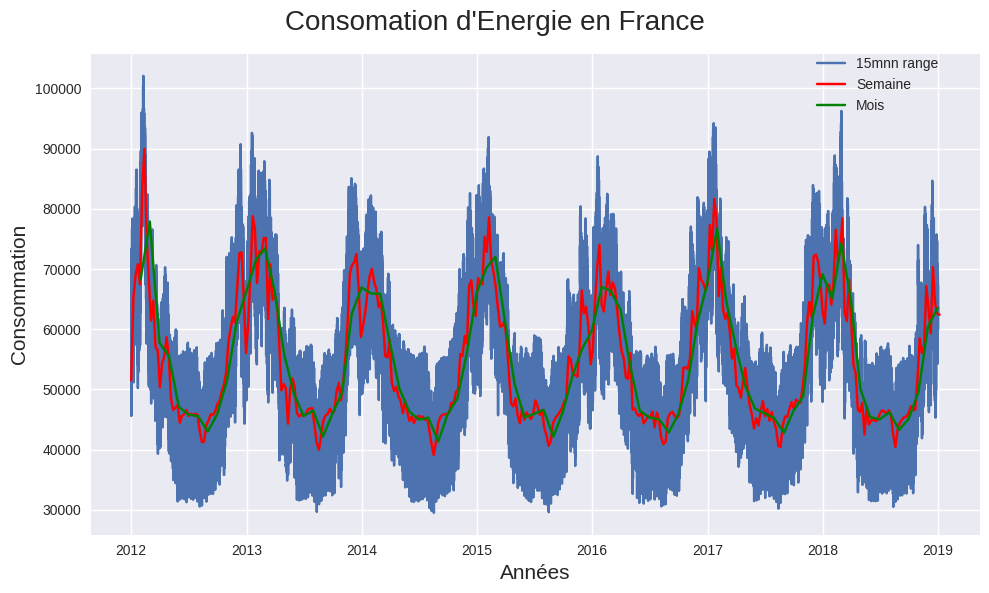

In [148]:
plt.style.use('seaborn')
fig = plt.figure(layout="tight", figsize=(10, 6))
fig.suptitle("Consomation d'Energie en France", fontsize=20)
ax = fig.subplots()
ax.plot(df_n.index, df_n['Consommation'])
ax.plot(df_n["Consommation"].resample("W").mean(), color="r")
ax.plot(df_n["Consommation"].resample("M").mean(), color="g")
ax.set_xlabel("Années", loc="center", fontsize=15)
ax.set_ylabel("Consommation", loc="center", fontsize=15)#, c=colors[color1])
fig.legend(["15mnn range", "Semaine", "Mois"],loc=(0.82, 0.8))

### Plot Consommation = f(Annee) --> Bar and bin size

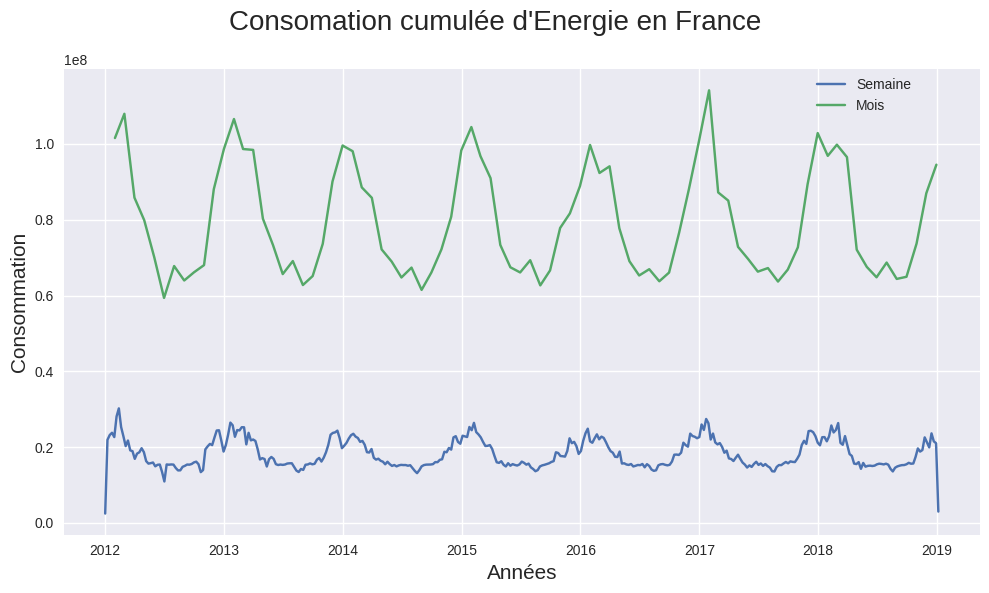

In [152]:
plt.style.use('seaborn')
fig = plt.figure(layout="tight", figsize=(10, 6))
fig.suptitle("Consomation cumulée d'Energie en France", fontsize=20)
ax = fig.subplots()
ax.plot(df_n["Consommation"].resample("W").sum())
ax.plot(df_n["Consommation"].resample("M").sum())
ax.set_xlabel("Années", loc="center", fontsize=15)
ax.set_ylabel("Consommation", loc="center", fontsize=15)#, c=colors[color1])
fig.legend(["Semaine", "Mois"],loc=(0.82, 0.8))

#### production des différentes sources

In [154]:
df_n.columns

Index(['Consommation', 'Prévision J-1', 'Prévision J', 'Fioul', 'Charbon',
       'Gaz', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioénergies', 'Ech. physiques', 'Taux de Co2', 'Ech. comm. Angleterre',
       'Ech. comm. Espagne', 'Ech. comm. Italie', 'Ech. comm. Suisse',
       'Ech. comm. Allemagne-Belgique', 'Fioul - TAC', 'Fioul - Cogén.',
       'Fioul - Autres', 'Gaz - TAC', 'Gaz - Cogén.', 'Gaz - CCG',
       'Gaz - Autres', 'Hydraulique - Fil de l?eau + éclusée',
       'Hydraulique - Lacs', 'Hydraulique - STEP turbinage',
       'Bioénergies - Déchets', 'Bioénergies - Biomasse',
       'Bioénergies - Biogaz'],
      dtype='object')

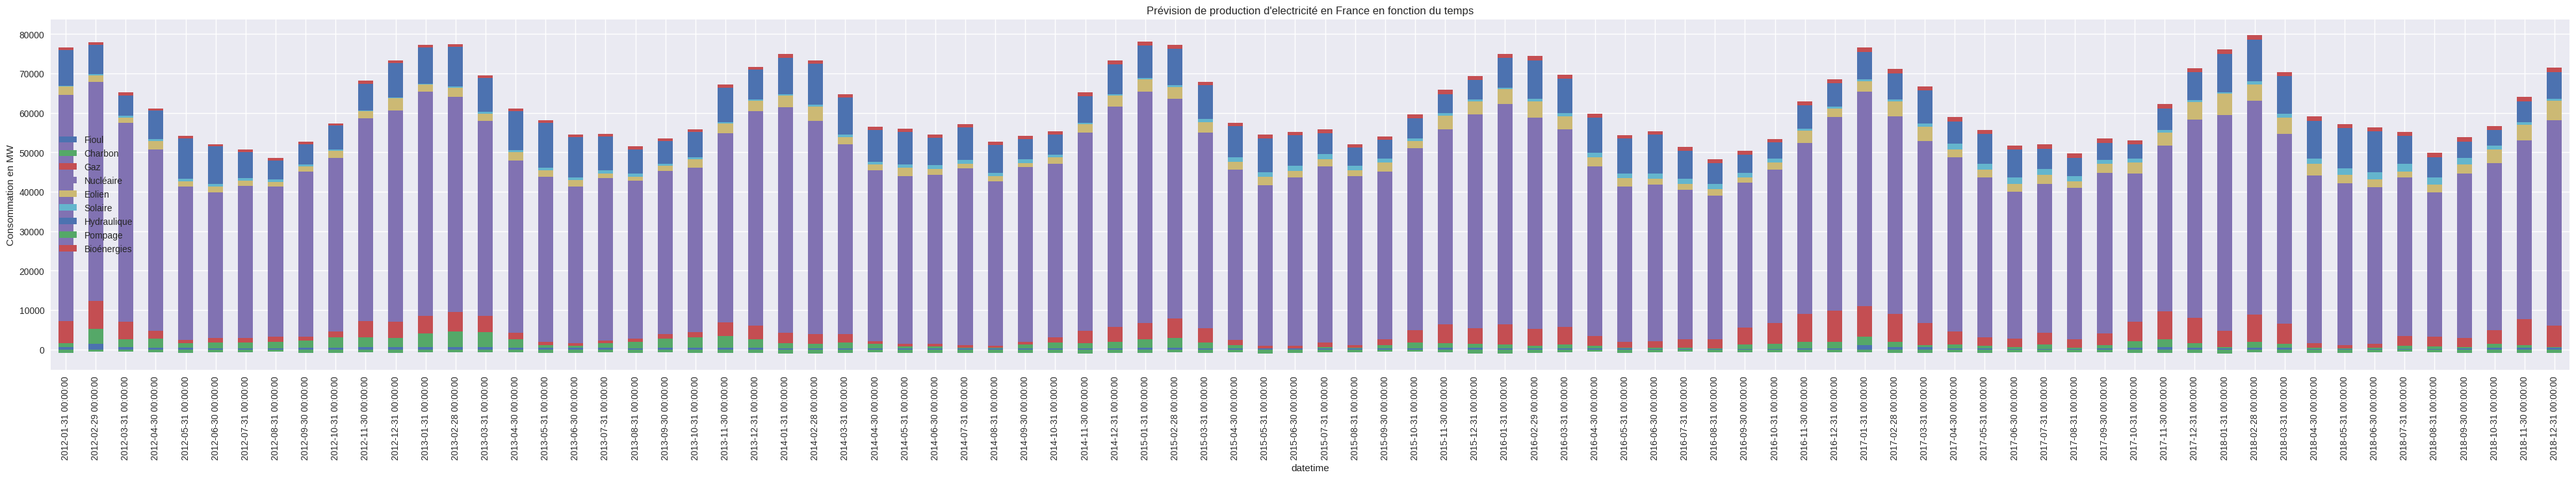

In [179]:
liste_energie = ['Fioul', 'Charbon', 'Gaz', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies']
histx = df_n.groupby(pd.Grouper(freq="M")).mean().plot.bar(y=liste_energie,figsize=(50,7),title = "Prévision de production d'electricité en France en fonction du temps", ylabel = 'Consommation en MW', stacked=True)

#### production nucléaire, consommation et échanges aux frontières

#### fonctionnement de base ou ponctuel ?

### Dataset régional


Attention à bien nuancer nos propos dans cette partie là : chaque région n'est pas égale en population, en superficie,...
- https://www.ined.fr/fr/tout-savoir-population/chiffres/france/structure-population/regions-departements/
- https://www.regions-departements-france.fr/regions-francaises.html

#### Manipulation de notre dataframe avec les index : récupération de la consommation par région

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

#### consommation en fonction du temps

#### différences comportementales entre les régions

#### les plus consommatrices

#### production nucléaire

#### production solaire / éolien


## Comparaison des situations régionales

**TODO**

1. Autonomie électrique des régions : 
    - Afficher la 'consommation - sum(productions)' pour chaque région
    - Quelles régions sont autonomes ? En excès ? En déficit ?
    - Comparer ce résultat à la colonne 'Ech. physiques'
    - Bonus: reconstruire les flux inter-régionaux ...

    
2. Etude de la production solaire :
    - Quelle région produit le plus (en moyenne et au max) ? 
    - Quelle évolution sur les dernières années ?
    - Quelle région a le meilleur taux 'énergie produite / puissance installée' ? (la puissance installée peut être assimilée au maximum produit, attention cette capacité peut augmenter dans le temps...)

    
3. Mêmes questions pour l'éolien
    

**Aide**


- Les méthodes groupby, unstack, ou pivot sont très utiles pour manipuler des dataframes


### Autonomie électrique des régions

#### Afficher la 'consommation - sum(productions)' pour chaque région

#### Quelles régions sont autonomes ? en exces ? en déficit ?

#### Comparer ce résultat à la colonne 'Ech. physiques'

#### Bonus : reconstruire les flux inter-régionaux ...

### Etude de la production solaire

### Mêmes questions pour l'éolien

## Etude des consommations 

**TODO**


1. Afficher les moyennes des consommations régionales pour chaque année, avec et sans standardisation. Quelles informations visualisez vous ?
    
2. Faire pareil avec la moyenne de consommation selon le jour de la semaine.

3. Tracer les consommations horaires (par heure) moyenne par région en décembre et en juin. Peut-on observer les différences d'ensoleillement entre les régions ?

4. Tracer ces mêmes courbes, en ne sélectionnant que les jours de semaine, puis que les jours de week end. Quelles différences de comportement peut-on observer ?


**Aide**

- un DatetimeIndex possède de nombreux attributs et méthodes utiles: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html
- Regarder la doc des méthodes groupby, unstack, pivot...
- Si besoin, utiliser la méthode seaborn.heatmap pour visualiser vos résultats (cmap="YlGnBu")



#### moyennes des consommations régionales pour chaque année, avec et sans standardisation

#### moyenne de consommation selon le jour de la semaine

#### consommations décembre vs juin

#### consommation semaine vs week end

# Relation entre les features / variables

## Liens productions / consommation

**TODO**
        
- Afficher les correlations entre toutes les productions et la consommation
- Quelles éléments sont corrélés parce que liés ? Quels éléments sont corrélés mais n'ont à priori pas de lien de cause à effet ?
- Quel indice montre que la consommation 'cause' la production avec du gaz ?
- Quels types de productions permettent de "suivre" la consommation ? Lesquels ne le permettent pas du tout (productions "fatales")
- Choisissez une ou deux régions et observez ces mêmes corrélations.

BONUS : Visualisation de la PCA :
- La consommation nationale et la production nucléaire sont fortement correlées. Tracer un scatterplot de l'une en fct de l'autre.
- Effectuer une PCA pour passer de deux dimensions à une seule, puis visualiser sur le plot précédent la composante obtenue.

Le nucléaire produit beaucoup, mais est peu pilotable. <br/>
En revanche le gaz est allumé lorsqu'il y a beaucoup de demande : la demande cause la production de gaz.

### Au niveau national

#### Afficher les correlations entre toutes les productions et la consommation

#### Quels éléments sont corrélés parce que liés ? Quels éléments sont corrélés mais n'ont à priori pas de lien de cause à effet ?

Les corrélations peuvent être dues à une relation de causalité, par exemple, une hausse rapide de la consommation va entrainer une hausse de la production avec du gaz. Ainsi on peut noter que la production de gaz suit une hausse de la consommation. Ce genre d'intuition est à l'origine de la notion de [causalité de Granger](https://en.wikipedia.org/wiki/Granger_causality)

#### Quel indice montre que la consommation 'cause' la production avec du gaz?

Ci dessous on vérifie que la production de gaz suit en moyenne la hausse de la consommation :<br/>
An idea from: https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas

#### Quels types de productions permettent de "suivre" la consommation ? Lesquels ne le permettent pas du tout (productions "fatales")

### Au niveau régional

## Prix de l'électricité

On s'intéresse maintenant aux données dans le dossier "data entsoe".<br/>
https://doc.opendatadsl.com/docs/company/ENTSOE#entsoe_el_tl_actcf

**TODO**

- Charger les prix de marché de l'électricité  (en France et en Allemagne)  <br/>
- Chercher les liens (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) entre : 
    - Le prix de l'électricité et la consommation nationale ?
    - Le prix de l'électricité et les sources de production ? 
    - Quelles sources semblent associées aux prix élevés ? aux prix faibles ?
            
**Aide:**

- Attention aux timezone ! Les prix sont en UTC. Les méthodes **tz_localize('UTC') et tz_convert('Europe/Paris')** pourraient vous aider ...
- On ne peut pas comparer timeserie "localisée" avec une autre qui ne l'est pas ("naive")
- Pour associer le dataframe de conso/prod à une timezone : les changements d'heures ont mal été gérés (cherchez à comprendre le problème). Utliser **"ambiguous = 'NaT', nonexistent='NaT'"** pour le contourner.
- Y a-t-il des **outliers** ?

#### Charger les prix de marché de l'électricité (en France et en Allemagne)

<details><summary>Code import données électricité</summary><br>
def read_data_entsoe(file):<br/>
    df = pd.read_csv(file)<br/>
    df['start'], _ = df['MTU (UTC)'].str.split(' - ', 1).str<br/>
    df.set_index('start', inplace=True)<br/>
    df.index = pd.to_datetime(df.index, yearfirst=True)<br/>
    df.drop(columns=['MTU (UTC)'], inplace=True)<br/>
    return df<br/>
    
DATA_FILE = './data/data entsoe/France/'<br/>

def get_prices(folder, col='fr'):<br/>
    df_prices = []<br/>
    for f in listdir(folder):<br/>
        df = read_data_entsoe(folder + f)<br/>
        df.columns = [col]<br/>
        df_prices.append(df)<br/>
    df_prices= pd.concat(df_prices, axis=0)<br/>
    return df_prices<br/>

df_prices = pd.concat((get_prices('./data/data entsoe/Electricity_price/France/', 'fr'),<br/>
                         get_prices('./data/data entsoe/Electricity_price/Germany/', 'ger')), 1)<br/>
</details>

#### Recherche de liens

## Emissions de CO2

**TODO**

- Quel lien entre le taux de C02 et les différentes sources de productions ?
- Quelles sources semblent les plus émettrices ?

## Caractéristation des échanges avec les frontières
**TODO**

- A quel moment les échanges ont-il principalement lieu ?
- Quel est le prix payé par la France lorsqu'elle importe de l'électricité ? 
- Quel est le prix reçu lors des exportations ?


` >0 = importation, <0 = exportation`

#### A quel moment les échanges ont-il principalement lieu ?

#### Quel est le prix payé par la France lorsqu'elle importe / exporte de l'électricité ?